# Baselines

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns

In [2]:
import mantrap
import mantrap_evaluation
import pandas as pd
import torch

solvers = {"rrt": mantrap.solver.baselines.RRTStarSolver, 
           "orca": mantrap.solver.baselines.ORCASolver,
           "mcts": mantrap.solver.baselines.MonteCarloTreeSearch,
           "ipopt": mantrap.solver.IPOPTSolver}

eval_df = pd.DataFrame()
for num_ados in [2, 3, 4, 10]:
    for n in range(5):
        env, goal, _ = mantrap_evaluation.scenarios.random(mantrap.environment.PotentialFieldEnvironment, 
                                                           num_ados=num_ados)
        for name, solver in solvers.items():
            print(f"Evaluating {name} => {num_ados} => {n}")
            solver = solver(env, goal, warm_start=mantrap.constants.WARM_START_SOFT,
                            attention_module=mantrap.attention.ClosestModule,
                            eval_env=mantrap.environment.SGAN)
            eval_df_k, _, _ = mantrap_evaluation.evaluate(solver, label=name, time_steps=10, num_tests=3, mean_df=False)
            eval_df_k["num_ados"] = num_ados
            eval_df_k["method"] = name
            eval_df = eval_df.append(eval_df_k)

Evaluating rrt => 2 => 0
Evaluating orca => 2 => 0
Evaluating mcts => 2 => 0
Evaluating ipopt => 2 => 0
Evaluating rrt => 2 => 1
Evaluating orca => 2 => 1
Evaluating mcts => 2 => 1
Evaluating ipopt => 2 => 1
Evaluating rrt => 2 => 2
Evaluating orca => 2 => 2
Evaluating mcts => 2 => 2
Evaluating ipopt => 2 => 2
Evaluating rrt => 2 => 3
Evaluating orca => 2 => 3
Evaluating mcts => 2 => 3
Evaluating ipopt => 2 => 3
Evaluating rrt => 2 => 4
Evaluating orca => 2 => 4
Evaluating mcts => 2 => 4
Evaluating ipopt => 2 => 4
Evaluating rrt => 3 => 0
Evaluating orca => 3 => 0
Evaluating mcts => 3 => 0
Evaluating ipopt => 3 => 0
Evaluating rrt => 3 => 1
Evaluating orca => 3 => 1
Evaluating mcts => 3 => 1
Evaluating ipopt => 3 => 1
Evaluating rrt => 3 => 2
Evaluating orca => 3 => 2
Evaluating mcts => 3 => 2
Evaluating ipopt => 3 => 2
Evaluating rrt => 3 => 3
Evaluating orca => 3 => 3
Evaluating mcts => 3 => 3
Evaluating ipopt => 3 => 3
Evaluating rrt => 3 => 4
Evaluating orca => 3 => 4
Evaluating mc

In [3]:
eval_df

,ado_effort,directness,ego_effort,extra_time,final_distance,minimal_distance,runtime[s],num_ados,method
0,5.302669,0.848177,1.053774,-0.4,0.201231,13.697436,0.261490,2,rrt
1,6.732452,0.628493,1.111410,-0.4,0.467885,4.394653,0.258710,2,rrt
2,5.619989,0.634261,1.196895,-0.4,0.465737,12.083498,0.253252,2,rrt
0,7.285233,0.800000,1.000000,-0.4,0.047332,7.096384,0.014991,2,orca
1,6.130533,0.800000,1.000000,-0.4,0.047332,12.020719,0.014806,2,orca
...,...,...,...,...,...,...,...,...,...
1,7.155684,0.920987,0.774563,0.4,0.232655,2.651592,0.428385,10,mcts
2,7.355991,0.991242,0.594993,0.4,0.061764,2.651592,0.451312,10,mcts
0,7.286551,0.869946,0.656621,0.4,0.106212,2.651592,0.775983,10,ipopt
1,7.994543,0.993450,0.676185,0.0,0.061727,2.651592,0.068334,10,ipopt


In [4]:
eval_df.groupby("method").mean()

,ado_effort,directness,ego_effort,extra_time,final_distance,minimal_distance,runtime[s],num_ados
method,,,,,,,,
ipopt,6.789314,0.927291,0.613821,-0.020000,0.304027,4.507988,0.277575,4.75
mcts,7.030610,0.771043,0.757037,0.646667,0.511298,4.646126,0.672446,4.75
orca,6.855194,0.702617,0.965064,-0.400000,0.352115,3.685803,0.028751,4.75
rrt,7.126737,0.529839,1.176449,-0.400000,0.681520,3.382441,0.291960,4.75


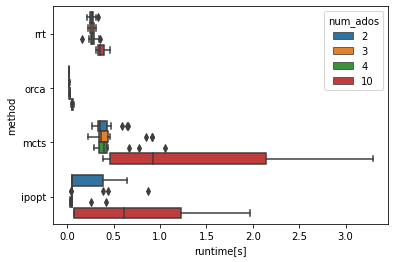

In [5]:
sns.boxplot("runtime[s]", y="method", hue="num_ados", data=eval_df)
plt.show()

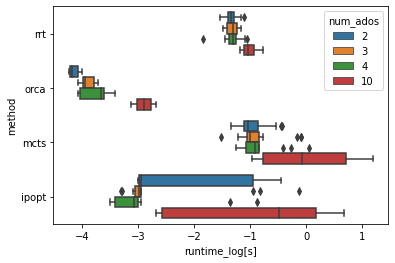

In [9]:
import numpy as np
eval_df["runtime_log[s]"] = np.log(eval_df["runtime[s]"])
sns.boxplot("runtime_log[s]", y="method", hue="num_ados", data=eval_df)
plt.savefig("/Users/sele/Desktop/runtime_peds.png", dpi=150)
plt.show()